데이터셋 크기: (489, 18)

컬럼 목록:
- name: 459 unique values
- year: 164 unique values
- writer: 267 unique values
- sortA: 5 unique values
- sortB: 2 unique values
- sortC: 3 unique values
- sortD: 3 unique values
- sortE: 3 unique values
- description: 460 unique values
- grade: 32 unique values
- rank: 136 unique values
- provider: 37 unique values
- 원소장처: 126 unique values
- webResourceURL: 473 unique values
- reference: 178 unique values
- original: 47 unique values
- translate: 21 unique values
- info: 87 unique values

결측치 현황:
name                0
year                8
writer              4
sortA             110
sortB             275
sortC             209
sortD             207
sortE             454
description         5
grade              99
rank              106
provider           11
원소장처              121
webResourceURL     10
reference         278
original          442
translate         468
info              395
dtype: int64


<Figure size 1000x600 with 0 Axes>

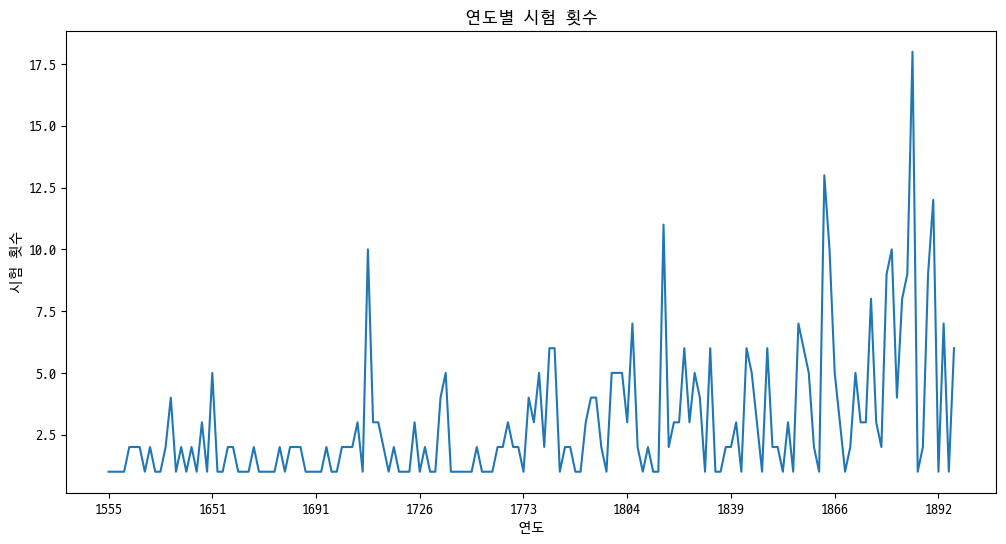

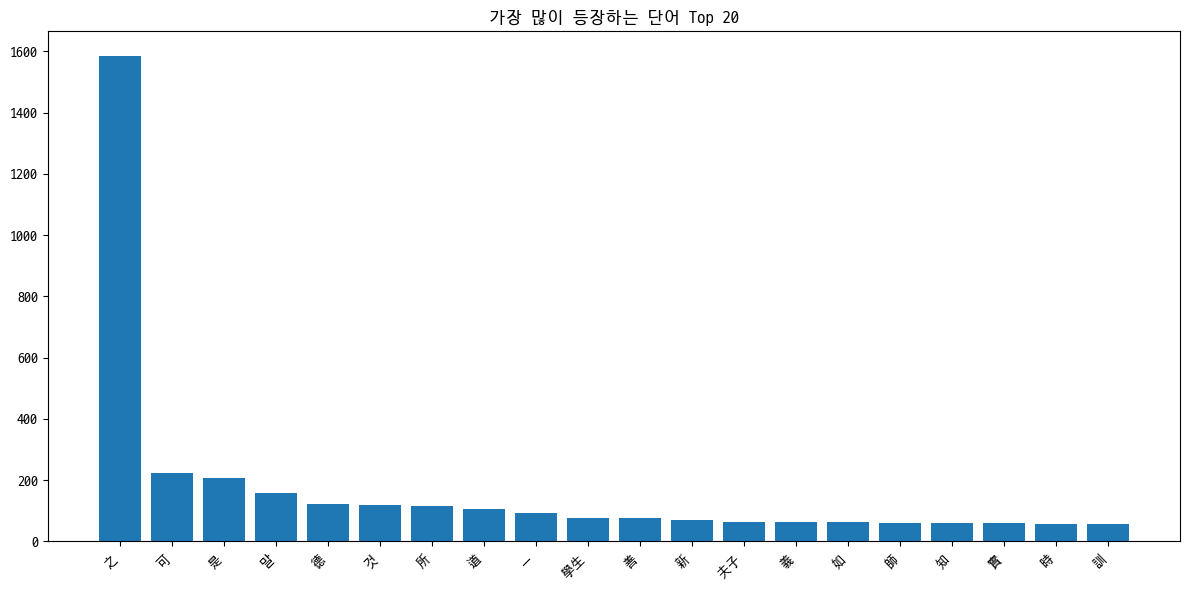

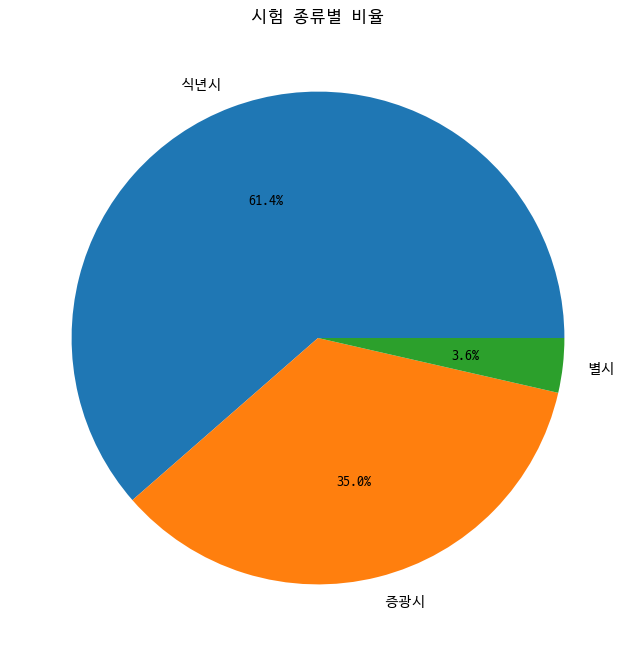

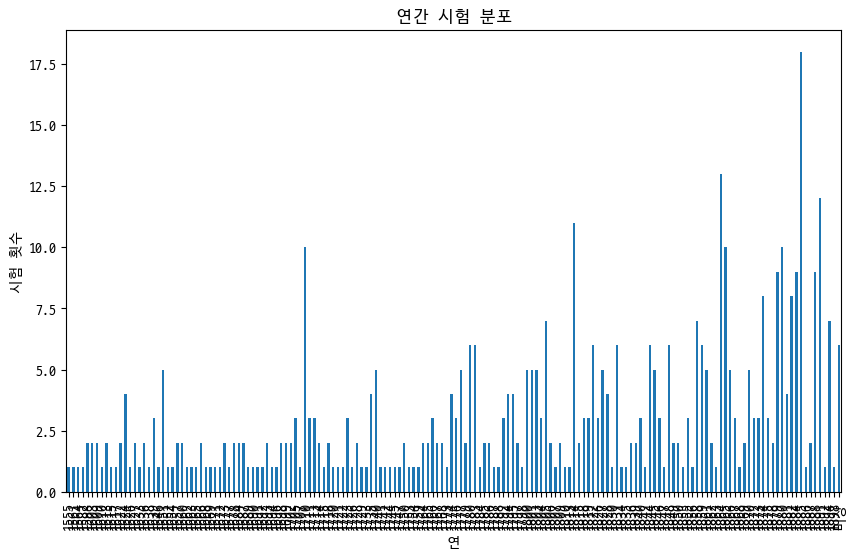

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from konlpy.tag import Mecab
import re

# 데이터 로드
df = pd.read_csv(r'../data/sigwon/sigwon.csv')

# 기본 정보 확인
print("데이터셋 크기:", df.shape)
print("\n컬럼 목록:")
for col in df.columns:
    print(f"- {col}: {df[col].nunique()} unique values")

# 결측치 확인
print("\n결측치 현황:")
print(df.isnull().sum())

# 시험 유형 분포
plt.figure(figsize=(10, 6))
# df['category'].value_counts().plot(kind='bar')
# plt.title('시험 유형 분포')
# plt.xticks(rotation=45)
# plt.show()

# 연도별 시험 횟수
yearly_exams = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
yearly_exams.plot(kind='line')
plt.title('연도별 시험 횟수')
plt.xlabel('연도')
plt.ylabel('시험 횟수')
plt.show()

# 텍스트 데이터 분석 (contents 컬럼)
mecab = Mecab()

def preprocess_text(text):
    # 한자와 한글만 남기고 제거
    text = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣\u4e00-\u9fff]', '', str(text))
    return text

# 형태소 분석
text_data = df['original'].apply(preprocess_text)
words = []
for text in text_data:
    words.extend(mecab.nouns(text))

# 가장 많이 등장하는 단어 시각화
word_freq = Counter(words).most_common(20)
words, counts = zip(*word_freq)

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('가장 많이 등장하는 단어 Top 20')
plt.tight_layout()
plt.show()

# 시험 종류별 분석
exam_types = df['sortC'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(exam_types, labels=exam_types.index, autopct='%1.1f%%')
plt.title('시험 종류별 비율')
plt.show()

# 월별 시험 분포
monthly_exams = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_exams.plot(kind='bar')
plt.title('연간 시험 분포')
plt.xlabel('연')
plt.ylabel('시험 횟수')
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from konlpy.tag import Mecab
import re
import os

# 디렉토리 생성
output_dir = "sig_outputs"
os.makedirs(output_dir, exist_ok=True)

# Basic info
print("Dataset size:", df.shape)
print("\nColumn list:")
for col in df.columns:
    print(f"- {col}: {df[col].nunique()} unique values")

# Missing values
print("\nMissing values:")
print(df.isnull().sum())

# 1. Exam type distribution
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')
plt.title('Distribution of Exam Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'exam_type_distribution.png'))
plt.close()

# 2. Number of exams by year
yearly_exams = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
yearly_exams.plot(kind='line')
plt.title('Number of Exams by Year')
plt.xlabel('Year')
plt.ylabel('Number of Exams')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'yearly_exam_count.png'))
plt.close()

# 3. Morphological analysis (contents)
mecab = Mecab()

def preprocess_text(text):
    return re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣\u4e00-\u9fff]', '', str(text))

text_data = df['contents'].apply(preprocess_text)
words = []
for text in text_data:
    words.extend(mecab.nouns(text))

word_freq = Counter(words).most_common(20)
words_, counts_ = zip(*word_freq)

plt.figure(figsize=(12, 6))
plt.bar(words_, counts_)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Words')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'top20_frequent_words.png'))
plt.close()

# 4. Analysis by exam type
exam_types = df['sortC'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(exam_types, labels=exam_types.index, autopct='%1.1f%%')
plt.title('Distribution by Exam Type')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'exam_type_pie.png'))
plt.close()

# 5. Monthly distribution of exams
monthly_exams = df['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_exams.plot(kind='bar')
plt.title('Monthly Distribution of Exams')
plt.xlabel('Month')
plt.ylabel('Number of Exams')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'monthly_exam_distribution.png'))
plt.close()

NameError: name 'df' is not defined